In [1]:
# Stammdaten
rawdataFolder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
campaignId    = "05_Setup_8"
measurementId = "200225_14"
signalAmplitude = 0.2

In [2]:
import sys
sys.path.append("../toolbox/")
from workflow import *
from jitterClass import analyseMeasurement
import importlib

read done


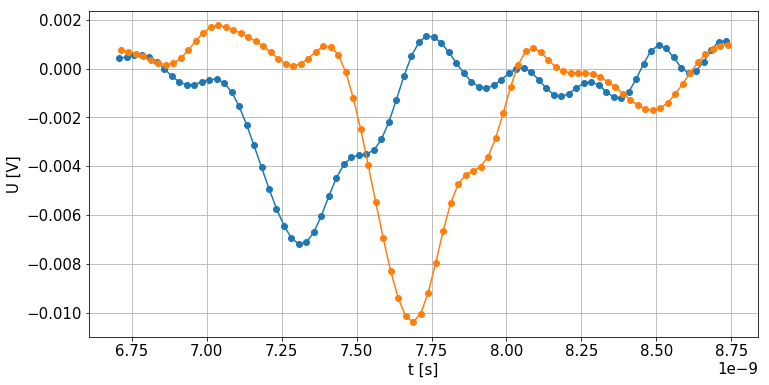

showRawPulse done


In [10]:
M18_02 = analyseMeasurement(rawdataFolder, campaignId, measurementId, signalAmplitude, diagnose = True)

M18_02.read(channels = ["C3", "C1"])

M18_02.showRawPulse(pulseNr = 0, style="o-")

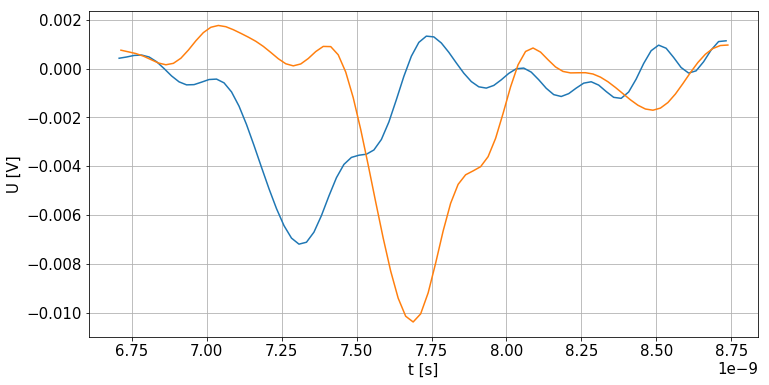

showRawPulse done


In [11]:
M18_02.showRawPulse(pulseNr = 0, style="-")

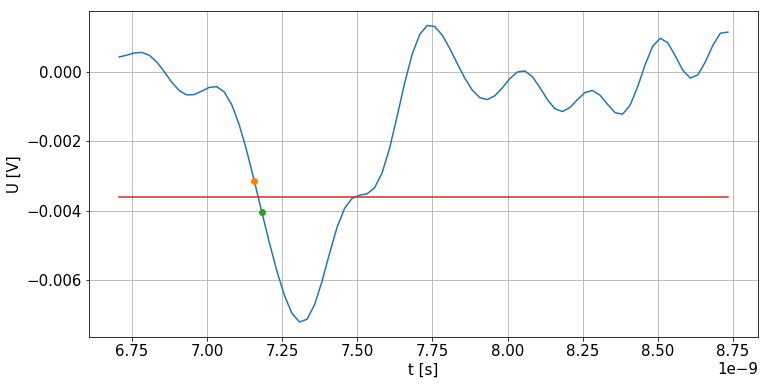

xt: 7.170302617198343e-09 ps, yt -0.0035976459025732765 ps


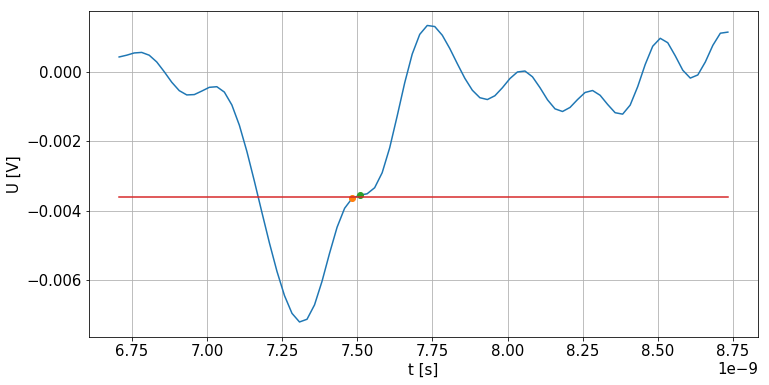

xt: 7.494182390875552e-09 ps, yt -0.0035976459025732765 ps


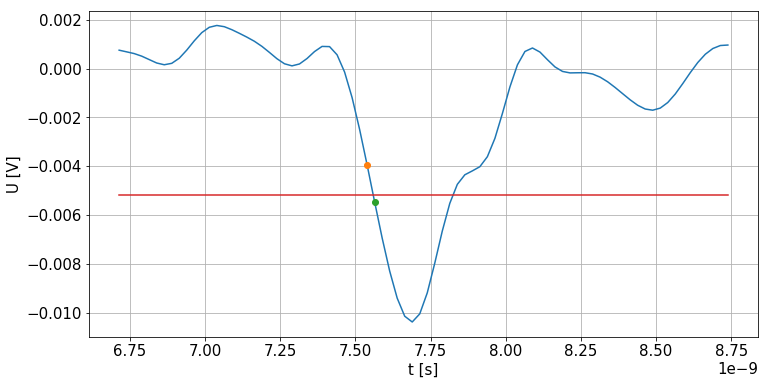

xt: 7.559251268172877e-09 ps, yt -0.0051933531901795504 ps


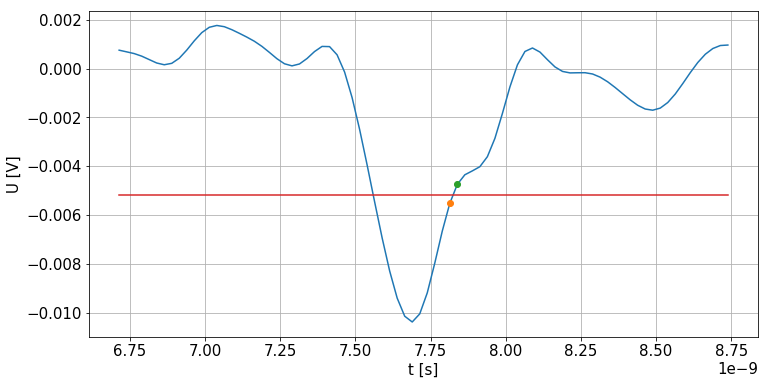

xt: 7.824313384719193e-09 ps, yt -0.0051933531901795504 ps
calculateDelta done
calculateDelta done
calculateDelta done


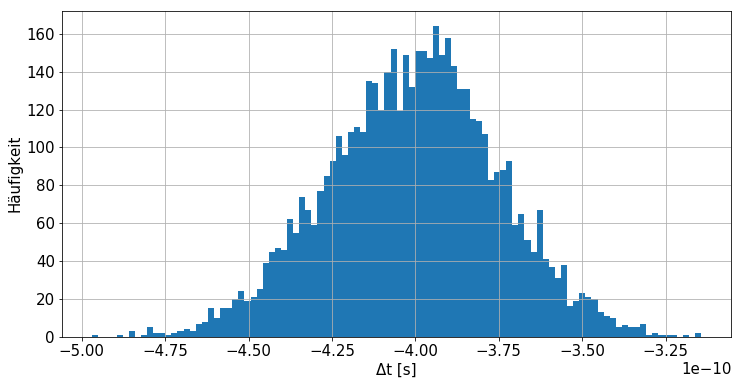

histogram done


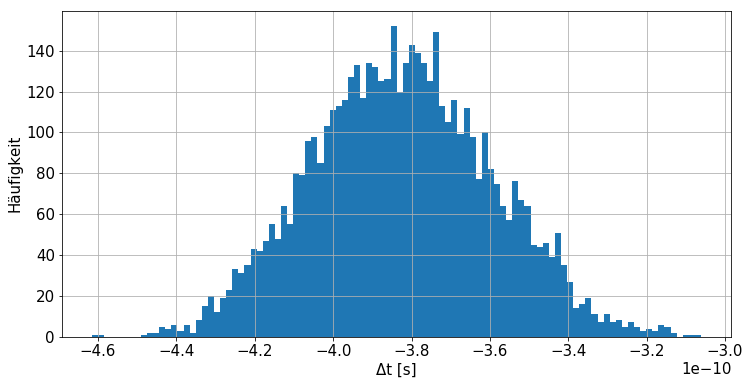

histogram done


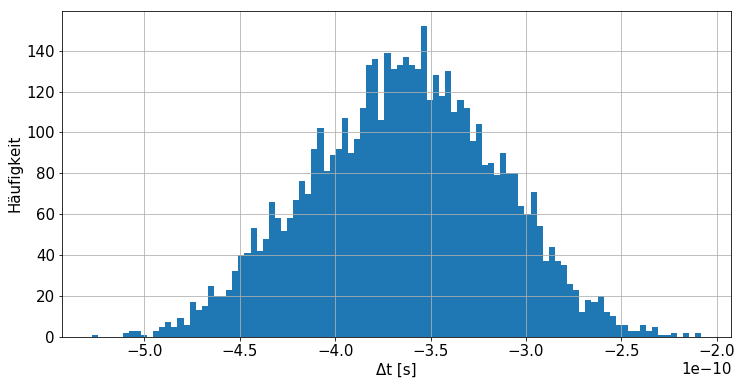

histogram done
56


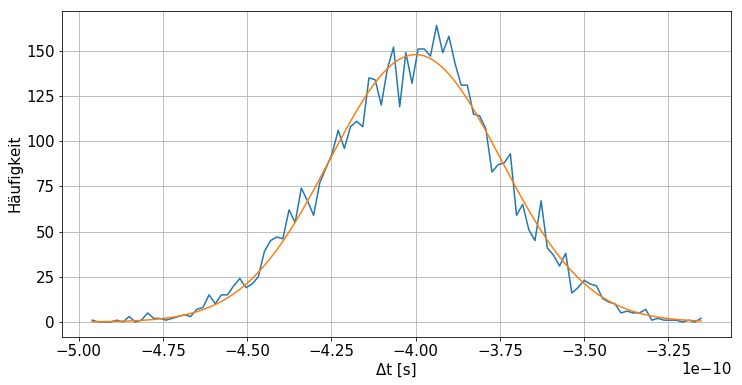

parameter: [ 9.43004191e-09 -4.00022863e-10  2.54281282e-11] [A, mu, sigma]
fitHist done
49


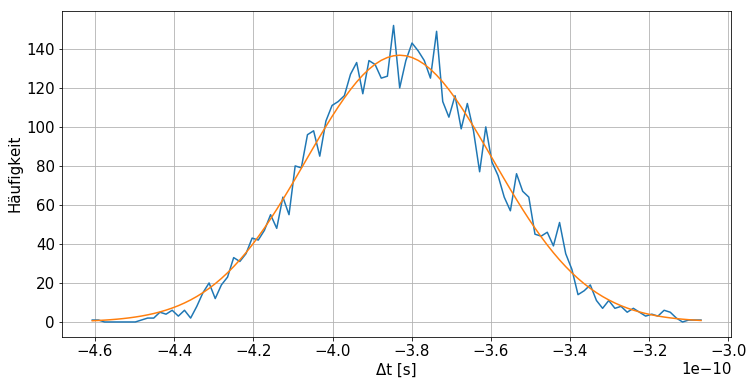

parameter: [ 8.10818722e-09 -3.83033967e-10  2.36540493e-11] [A, mu, sigma]
fitHist done
54


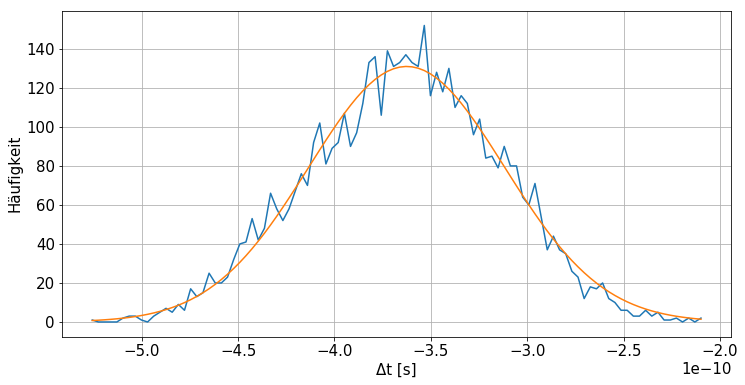

parameter: [ 1.66682446e-08 -3.62538027e-10  5.07646302e-11] [A, mu, sigma]
fitHist done


In [17]:
absolute = False
threshold = 0.5

if(absolute):
    s = "Abs"
else:
    s = "Rel"
name = "thres{:d}".format(int(threshold * 100)) + s
 
M18_02.threshold(absolute = absolute, threshold = threshold)

M18_02.calculateDelta(name + "F", M18_02.data["thres"][name][0,0,:,0], M18_02.data["thres"][name][1,0,:,0])
M18_02.calculateDelta(name + "C", M18_02.data["thres"][name][0,1,:,0], M18_02.data["thres"][name][1,1,:,0])
M18_02.calculateDelta(name + "R", M18_02.data["thres"][name][0,2,:,0], M18_02.data["thres"][name][1,2,:,0])

M18_02.histogram(name + "F", name + "F")
M18_02.histogram(name + "C", name + "C")
M18_02.histogram(name + "R", name + "R")

M18_02.fitHist(name + "F", name + "F")
M18_02.fitHist(name + "C", name + "C")
M18_02.fitHist(name + "R", name + "R")

In [18]:
M18_02.showResult(name + "F")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "C")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "R")

σ_0: 25.4281281709192 ps
σ_1: 17.980401862537647 ps
σ_1 = σ_0 / sqrt(2)

μ: -400.02286331365474 ps

coma separated [σ_0, σ_1, μ]
2.54281281709192e-11,1.7980401862537647e-11,-4.000228633136547e-10

 tab separated [σ_0, σ_1, μ]
2.54281281709192e-11	1.7980401862537647e-11	-4.000228633136547e-10
---------------------------------------------------------------------------------------
σ_0: 23.65404931369162 ps
σ_1: 16.725938672232342 ps
σ_1 = σ_0 / sqrt(2)

μ: -383.0339672640444 ps

coma separated [σ_0, σ_1, μ]
2.3654049313691618e-11,1.6725938672232343e-11,-3.830339672640444e-10

 tab separated [σ_0, σ_1, μ]
2.3654049313691618e-11	1.6725938672232343e-11	-3.830339672640444e-10
---------------------------------------------------------------------------------------
σ_0: 50.76463020018858 ps
σ_1: 35.89601425898074 ps
σ_1 = σ_0 / sqrt(2)

μ: -362.53802741916843 ps

coma separated [σ_0, σ_1, μ]
5.0764630200188576e-11,3.5896014258980743e-11,-3.6253802741916845e-10

 tab separated [σ_0, σ_1, μ]
5.076

iPeak: 24 iLeft: 15 iRight: 37


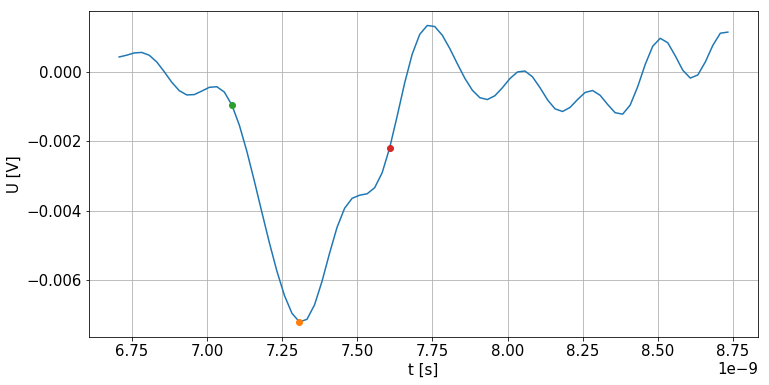

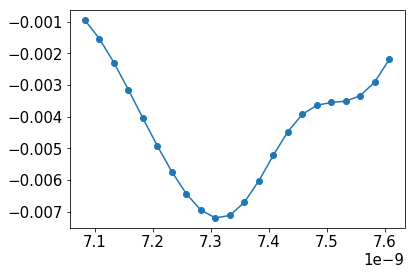

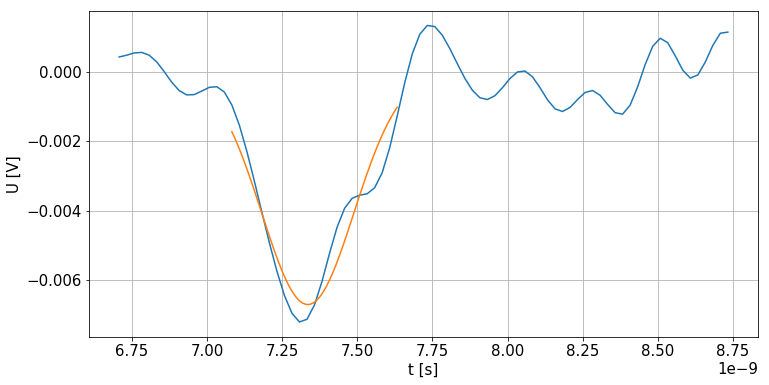

parameter: [-2.57132930e-12  7.33539925e-09  1.53213896e-10] [A, mu, sigma]
iPeak: 39 iLeft: 31 iRight: 51


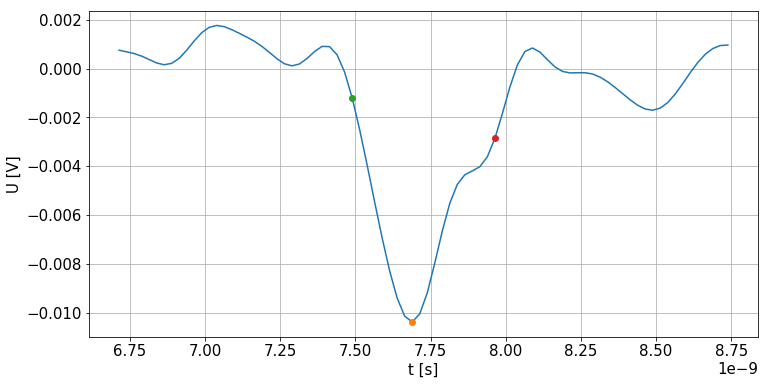

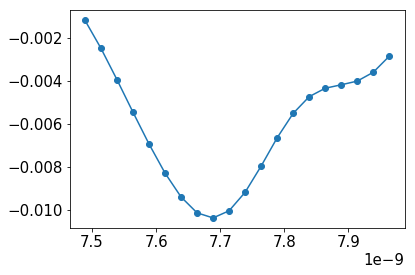

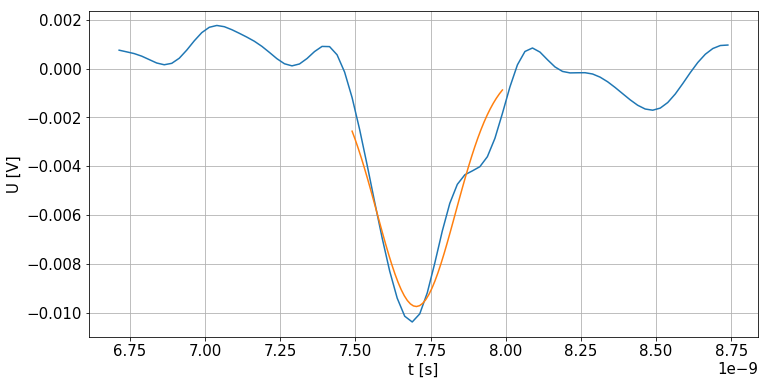

parameter: [-3.19072020e-12  7.70212762e-09  1.30511474e-10] [A, mu, sigma]
fitGauss done
calculateDelta done


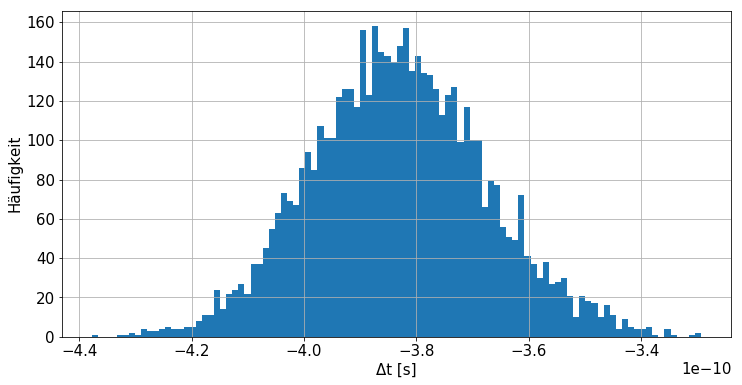

histogram done
46


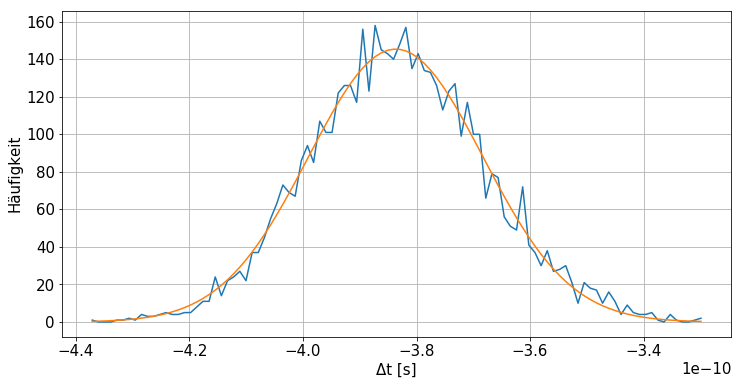

parameter: [ 5.58919461e-09 -3.83658009e-10  1.53355363e-11] [A, mu, sigma]
fitHist done


In [14]:
M18_02.fitGauss(threshold = 0.2, diagnosePulse=0)

M18_02.calculateDelta("gauss", M18_02.data["gauss"][0,:,1], M18_02.data["gauss"][1,:,1])

M18_02.histogram("gauss", "gauss")

M18_02.fitHist("gauss", "gauss")

In [15]:
M18_02.showResult("gauss")

σ_0: 15.335536317231336 ps
σ_1: 10.843861723046851 ps
σ_1 = σ_0 / sqrt(2)

μ: -383.65800946562956 ps

coma separated [σ_0, σ_1, μ]
1.5335536317231336e-11,1.0843861723046851e-11,-3.8365800946562956e-10

 tab separated [σ_0, σ_1, μ]
1.5335536317231336e-11	1.0843861723046851e-11	-3.8365800946562956e-10


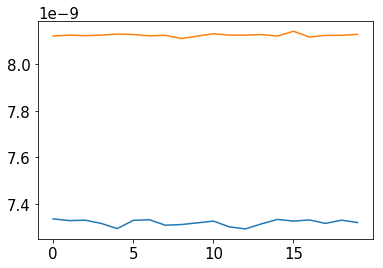

In [16]:
plt.plot(M18_02.data["gauss"][0,:,1][:20])
plt.plot(M18_02.data["gauss"][1,:,1][0:20] + 0.42e-9)

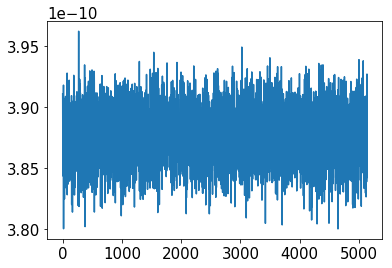

In [10]:
plt.plot(M18_02.data["gauss"][0,:,1] - M18_02.data["gauss"][1,:,1])

In [11]:
%load_ext autoreload

In [ ]:
exportedDict = M18_02.exportDict()
%autoreload
M18_02 = analyseMeasurement(diagnose = True)
M18_02.importDict(exportedDict)